In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing
import numpy as np

%matplotlib inline

In [24]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
data = pd.read_csv("./data/other_train.csv", index_col=0)

In [25]:
attributes_maros_df1 = ["age", "sex", "date_of_birth"]
attributes_maros_df2 = ["name", "address", "race", "native-country", "medical_info", "skewness_glucose", 
                        "kurtosis_glucose", "mean_glucose", "std_glucose", "class"]

print(len(attributes_maros_df1) + len(attributes_maros_df2) - 1)


data.head()

12


,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Michael Atchison,"4214 Kim Path\nLake Crystalstad, PA 11945",Asian-Pac-Islander,Married-civ-spouse,Sales,f,13.0,Husband,-0.392165,NaN,...,Bachelors,116358.0,0.0,52.705122,>50K,"{'mean_oxygen':'1.059364548','std_oxygen':'10....",?,50.0,0.0,Self-emp-inc
1,Thomas Whish,USS Obrien\nFPO AE 57226,Asian-Pac-Islander,Never-married,?,f,10.0,Own-child,0.272569,123.78125,...,Some-college,243190.0,0.0,45.520761,<=50K,"{'mean_oxygen':'2.557692308','std_oxygen':'14....",China,40.0,0.0,?
2,Michael Lewis,Unit 0924 Box 8905\nDPO AP 63128,White,Divorced,Other-service,f,9.0,Unmarried,1.757642,90.15625,...,HS-grad,96840.0,0.0,38.267855,<=50K,"{'mean_oxygen':'1.549331104','std_oxygen':'14....",United-States,40.0,0.0,Private
3,Everett Boyd,"PSC 2908, Box 8120\nAPO AA 38330",White,Married-civ-spouse,Craft-repair,f,13.0,Husband,-0.827640,99.28125,...,Bachelors,180439.0,0.0,71.956469,>50K,"{'mean_oxygen':'197.2341137','std_oxygen':'63....",United-States,40.0,0.0,Private
4,Markus Simonton,"97553 Nunez Ford\nAndersonville, KS 60178",White,Married-civ-spouse,?,f,10.0,Husband,-0.393304,108.2109375,...,Some-college,115745.0,0.0,52.285074,<=50K,"{'mean_oxygen':'1.617056856','std_oxygen':'16....",United-States,40.0,0.0,?


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3969 non-null   object 
 3   marital-status    3969 non-null   object 
 4   occupation        3969 non-null   object 
 5   pregnant          3973 non-null   object 
 6   education-num     3972 non-null   float64
 7   relationship      3965 non-null   object 
 8   skewness_glucose  3967 non-null   float64
 9   mean_glucose      3700 non-null   object 
 10  capital-gain      3970 non-null   float64
 11  kurtosis_glucose  3972 non-null   float64
 12  education         3973 non-null   object 
 13  fnlwgt            3969 non-null   float64
 14  class             3965 non-null   float64
 15  std_glucose       3573 non-null   float64
 16  income            3972 non-null   object 


In [27]:
data.describe()

,education-num,skewness_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3972.000000,3967.000000,3970.000000,3972.000000,3969.000000,3965.000000,3573.000000,3968.000000,3967.000000
mean,10.087865,4.225103,1004.693451,0.951313,188712.373898,0.255233,45.173588,40.323337,85.363247
std,2.541340,9.677499,6989.008333,1.611585,102553.561943,0.436047,7.696647,12.086865,396.320750
min,1.000000,-1.755332,0.000000,-1.641515,19847.000000,0.000000,25.695250,2.000000,0.000000
25%,9.000000,-0.120762,0.000000,0.070122,118551.000000,0.000000,40.084015,40.000000,0.000000
50%,10.000000,0.376293,0.000000,0.310279,178922.000000,0.000000,45.869299,40.000000,0.000000
75%,12.000000,2.090947,0.000000,0.773237,234743.000000,1.000000,50.423010,45.000000,0.000000
max,16.000000,68.101622,99999.000000,8.069522,806316.000000,1.000000,91.206475,99.000000,4356.000000


Zakladne deskriptivne statistiky

In [28]:
data.shape[0]

3983

Dataset obshuje 3983 zaznamov

In [29]:
data.shape[1]

22

Pocet atributov je 22

In [30]:
data.dtypes

name                 object
address              object
race                 object
marital-status       object
occupation           object
pregnant             object
education-num       float64
relationship         object
skewness_glucose    float64
mean_glucose         object
capital-gain        float64
kurtosis_glucose    float64
education            object
fnlwgt              float64
class               float64
std_glucose         float64
income               object
medical_info         object
native-country       object
hours-per-week      float64
capital-loss        float64
workclass            object
dtype: object

Typy atributov su rozdielne. Ide o stringy(object) v pocte 13 a float v pocte 9

Chybajuce data

Pocet riadkov s aspon jednou chybajucou hodnotou

In [31]:
data.shape[0] - data.dropna().shape[0]

724

In [32]:
data.isnull().sum()

name                  0
address               0
race                 14
marital-status       14
occupation           14
pregnant             10
education-num        11
relationship         18
skewness_glucose     16
mean_glucose        283
capital-gain         13
kurtosis_glucose     11
education            10
fnlwgt               14
class                18
std_glucose         410
income               11
medical_info         18
native-country        9
hours-per-week       15
capital-loss         16
workclass            16
dtype: int64

V datasete sa vyskutuje nulova hodnota v stlpcoch.

In [33]:
data.isnull().sum().sum()

941

Ich celkovy pocet je 941

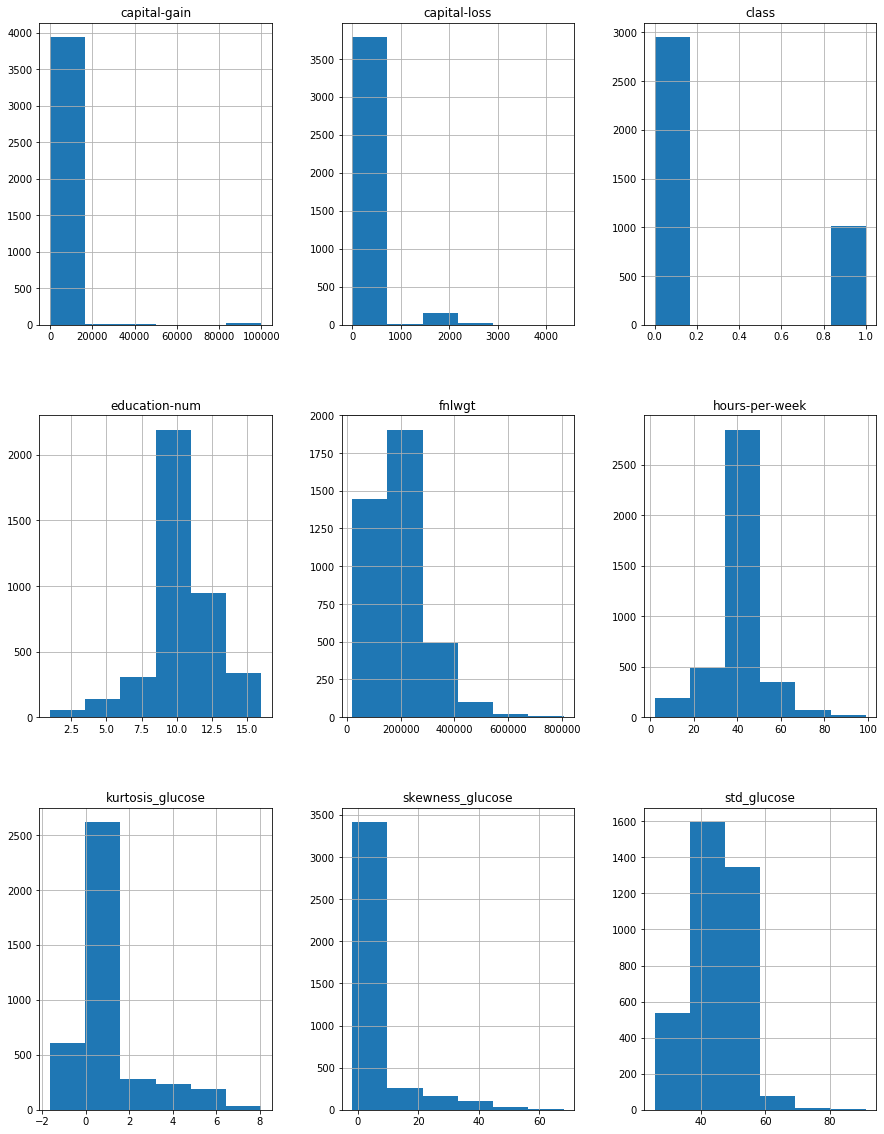

In [34]:
histogram = data.hist(bins =6, figsize = (15,20))

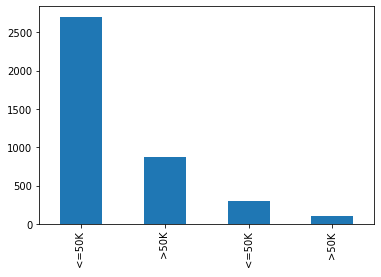

In [35]:
data.income.value_counts().plot(kind='bar')

In [36]:
data.income.value_counts()

 <=50K    2704
 >50K      871
<=50K      298
>50K        99
Name: income, dtype: int64

In [37]:
data.occupation.unique()

array([' Sales', ' ?', ' Other-service', ' Craft-repair',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Exec-managerial',
       ' Adm_clerical', ' Handlers_cleaners', ' Transport-moving',
       ' Protective-serv', ' Tech-support', ' Adm-clerical',
       ' Prof-specialty', ' Farming-fishing', nan, ' Craft_repair',
       ' Prof_specialty', ' Exec_managerial', ' Transport_moving',
       ' Tech_support', ' Priv-house-serv', ' Protective_serv',
       ' Machine_op_inspct', ' Other_service', ' Farming_fishing',
       ' Armed-Forces'], dtype=object)

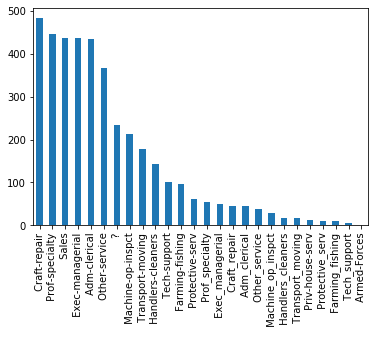

In [39]:
data.occupation.value_counts().plot(kind = 'bar')

In [40]:
data.workclass.unique()

array([' Self-emp-inc', ' ?', ' Private', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Local-gov', nan, ' Never-worked',
       ' Without-pay'], dtype=object)

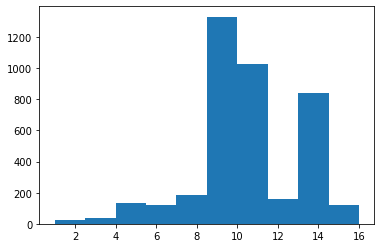

In [41]:
hist = plt.hist(data['education-num'].dropna(),bins=10)

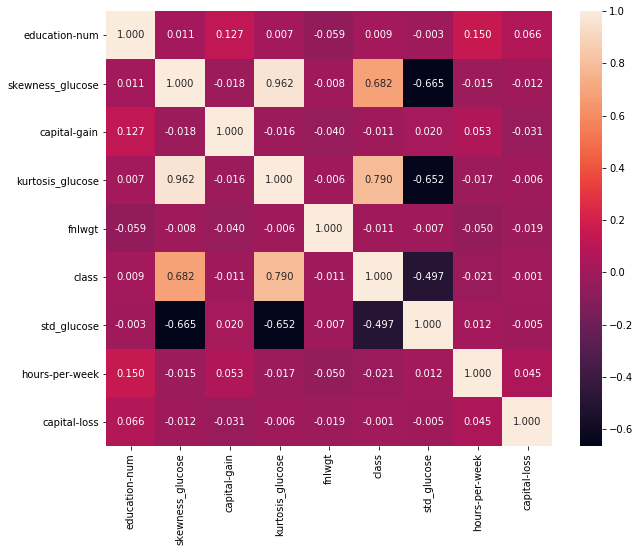

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),ax = ax, annot = True, fmt= ".3f")

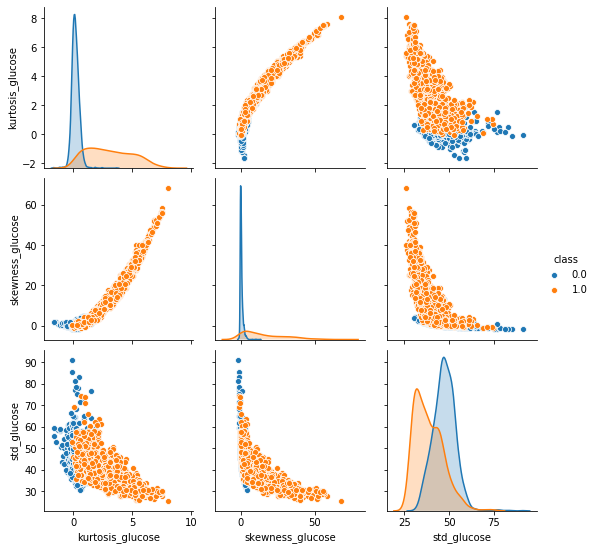

In [44]:
data_glucose = data.dropna()[['kurtosis_glucose', 'skewness_glucose', 'std_glucose', 'class']]

sns.pairplot(data_glucose, hue = 'class')

Person correlation : 0.962


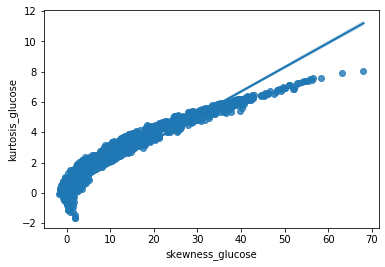

In [45]:
sns.regplot(x="skewness_glucose", y = "kurtosis_glucose", data = data)
print("Person correlation : %.3f" %data.skewness_glucose.corr(data.kurtosis_glucose))

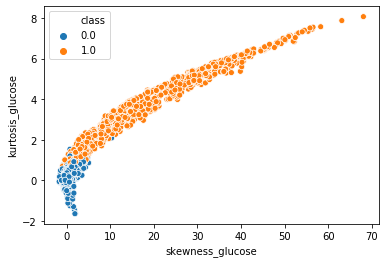

In [46]:
sns.scatterplot(data['skewness_glucose'], data['kurtosis_glucose'], hue=data['class'])

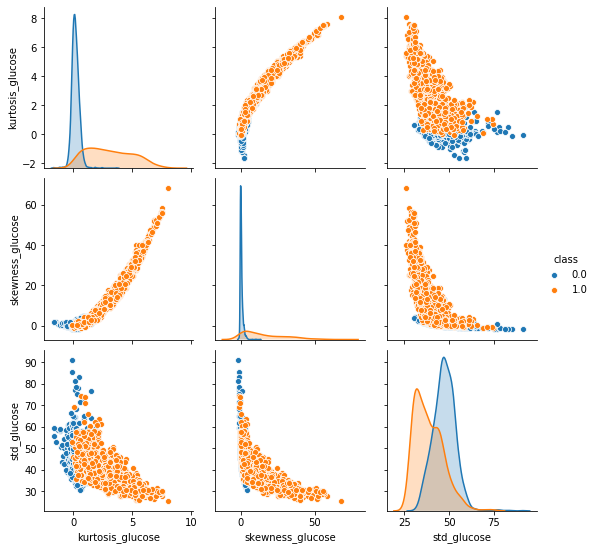

In [47]:
sns.pairplot(data.dropna()[[ 'kurtosis_glucose', 'skewness_glucose', 
                        'mean_glucose', 'std_glucose', 'class']], hue = 'class')

Formulacia a statisticke overenie hypotez o datach
Hypoteza : Pacienti, ktori maju cukrovku maju v priemere odlisnu hodnotu skewness_glucose.

Ako P hodnotu si volime 0.04

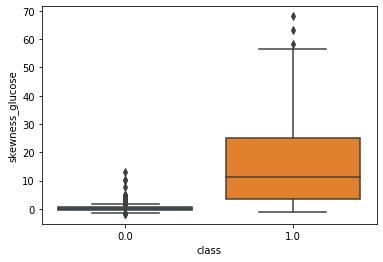

In [48]:
sns.boxplot('class', 'skewness_glucose', data=data)

In [50]:
skewness_glucose1 = data.loc[data['class'] == 1, 'skewness_glucose']
skewness_glucose1 = skewness_glucose1.dropna()

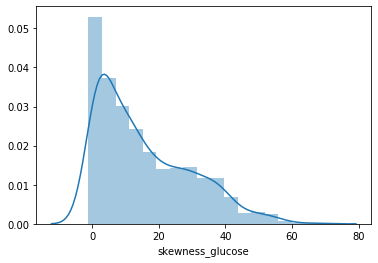

In [51]:
sns.distplot(skewness_glucose1)

In [52]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [53]:
skewness_glucose1_out = identify_outliers(skewness_glucose1)
skewness_glucose1_out

29      58.294501
1051    68.101622
3303    63.149537
Name: skewness_glucose, dtype: float64

In [54]:
skewness_glucose1 = skewness_glucose1.drop(skewness_glucose1_out.index)

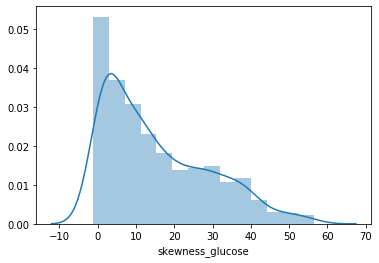

In [55]:
sns.distplot(skewness_glucose1)

In [56]:
skewness_glucose0 = data.loc[data['class'] == 0, 'skewness_glucose']
skewness_glucose0 = skewness_glucose0.dropna()

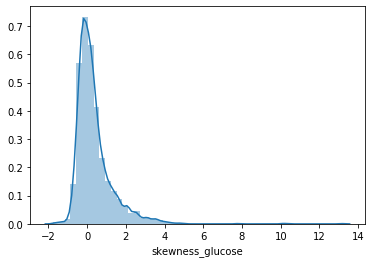

In [57]:
sns.distplot(skewness_glucose0)


In [58]:
skewness_glucose0_out = identify_outliers(skewness_glucose0)
skewness_glucose0_out

15      2.519991
22      2.705792
56      3.442103
63      2.008339
66      2.477926
          ...   
3866    2.259311
3867    2.375737
3876   -1.660049
3904    1.904882
3949    2.630586
Name: skewness_glucose, Length: 206, dtype: float64

In [59]:
skewness_glucose0 = skewness_glucose0.drop(skewness_glucose0_out.index)

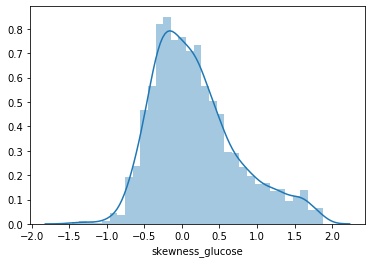

In [60]:
sns.distplot(skewness_glucose0)

In [ ]:
Data su upravene a pripravene na testovanie

In [61]:
stats.shapiro(skewness_glucose1)

(0.9024198651313782, 7.782816395325125e-25)

In [62]:
stats.shapiro(skewness_glucose0)

(0.9554296135902405, 3.88793376033906e-28)

Po pouziti shapirovho testu sme zistili ze p hodnoty su mensie ako 0.04, To znamena ze hypoteza sa zamieta a data su z ineho ako normalneho rozdelenia

In [63]:
stats.levene(skewness_glucose1,skewness_glucose0)

LeveneResult(statistic=3693.4169564414433, pvalue=0.0)

P<0.04, to znamena ze data su z roznej variancie. Budeme pouzivat t-test

In [64]:
stats.ttest_ind(skewness_glucose1,skewness_glucose0)

Ttest_indResult(statistic=57.855218543432734, pvalue=0.0)

Vyslo 0, to znamena ze mozeme tvrdit ze pacienti s cukrovkou maju v priemere rozdielnu hodnotu skewness_glucose.

# Identifikacia problemov


In [65]:
data.pregnant.unique()

array(['f', 'F', 'FALSE', 't', 'T', 'TRUE', nan], dtype=object)

Vo vrchnej casti sme si zobrazili aj pocty chybajucich dat, v dalsej faze mame v plane tento problem vyriesit tak ze ich doplnime na zaklade medianov alebe priemerov

In [66]:
data.name.duplicated().sum()

50

Vidime ze stlpec name ma 50 duplikatov

In [68]:
data_new = data.drop_duplicates(subset=['name', 'address'], keep = 'last')
data.shape[0]-data_new.shape[0]

50

Na zaklade vyssich vypisov sme si overili ci su duplikaty naozaj udaje o rovnakych osobach na zaklade ich adresy, vidime ze v tabulke je naozaj 50 duplikatov

In [70]:
data["income"].unique()

array(['>50K', ' <=50K', ' >50K', '<=50K', nan], dtype=object)

V stlpci income mame duplicitne nazvy ale niektore maju medzeru na zaciatku

In [71]:
data["pregnant"].unique()

array(['f', 'F', 'FALSE', 't', 'T', 'TRUE', nan], dtype=object)

Budeme musiet upravit aj prvy v stlpci pregnant, predpoklad je ze 'f','F','FALSE' su udaje ktore hovoria ze nie clovek nie je tehotny 
Ako aj 't','T','TRUE' su ten isty udaj len s inym oznacenim

In [72]:
data["medical_info"].head()

0    {'mean_oxygen':'1.059364548','std_oxygen':'10....
1    {'mean_oxygen':'2.557692308','std_oxygen':'14....
2    {'mean_oxygen':'1.549331104','std_oxygen':'14....
3    {'mean_oxygen':'197.2341137','std_oxygen':'63....
4    {'mean_oxygen':'1.617056856','std_oxygen':'16....
Name: medical_info, dtype: object

Vidime ze medical_info obsahuje v jednom udaji az 4 hodnoty, toto budeme musiet v dalsej faze rozdelit

Vychylene hodnoty budeme nahradzovat metodou na identifikáciu vychýlených hodnôt (outlierov) je označiť za vychýlenú hodnotu pozorovanie, ktoré sa odlišuje o viac ako 1,5 násobok medzikvartilového rozdelenia od horného, resp. dolného kvartilu. Zdroj: prednaska IAU 2019/2020

Spojenie oboch datasetov mozeme uskutocnit na zaklade mena. Avsak, nesedia pocty zaznamov, takze budeme musiet najst riesenie na tento problem.